# Data Exploration

In [1]:
# Load the data
import pandas as pd
pd.set_option("mode.use_inf_as_na", True)

data: pd.DataFrame = pd.read_csv("spotify_data_12_20_2023.csv")

# Remove the duration_sec if there are duplicates
# Doing this since I am testing multiple datasets and don't want to have to check for each one
if 'duration_ms' in data.columns and 'duration_sec' in data.columns:
    data.drop(columns = ['duration_sec'], inplace=True)

workable_data = data.select_dtypes(include = 'number', exclude='int64')

corr = workable_data.corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_11860\3074694536.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option("mode.use_inf_as_na", True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_11860\3074694536.py:5: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data: pd.DataFrame = pd.read_csv("spotify_data_12_20_2023.csv")


## Data Validity

In [2]:
# Test for dropped data
import numpy as np
from pandas import DataFrame
dropped_data: pd.DataFrame = data.dropna(how="any", axis=0, inplace=False)

print(f"Original data shape/size: {data.shape}/{data.size}")
print(f"Data after dropping na shape/size: {dropped_data.shape}/{dropped_data.size}")

if data.shape == dropped_data.shape:
    print("No empty data in the dataset.")
else:
    print("Empty data in the dataset.")
    data.replace([np.inf, -np.inf], np.nan, inplace=True) # BUG: Need a better way to drop
    # data.dropna(how='any', axis=0, inplace=True)
    data.dropna(axis=0, subset=['track_popularity', 'tempo', 'acousticness', 'danceability', 'release_year'], inplace=True)
    workable_data: DataFrame = data.select_dtypes(include = 'number', exclude='int64')
    corr = workable_data.corr()

del dropped_data # Delete for memory's sake

Original data shape/size: (375141, 48)/18006768
Data after dropping na shape/size: (583, 48)/27984
Empty data in the dataset.


In [3]:
# Test for duplicates
duplicate_data: pd.DataFrame = data.drop_duplicates(subset=['track_id'], inplace=False)

print(f"Original data shape/size: {data.shape}/{data.size}")
print(f"Data after dropping duplicates shape/size: {duplicate_data.shape}/{duplicate_data.size}")

if data.shape == duplicate_data.shape:
    print("No duplicate data in the dataset.")
else:
    print("Duplicate data in the dataset.")

# TODO: Explore more about what is in the duplicate data

del duplicate_data # Delete for memory's sake

Original data shape/size: (374332, 48)/17967936
Data after dropping duplicates shape/size: (374332, 48)/17967936
No duplicate data in the dataset.


## Data Patterns

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# corr = data.drop(columns=['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id']).corr()
corr.head()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.352598    -0.068755 -0.679736   
danceability         -0.352598      1.000000    -0.067993  0.242994   
duration_ms          -0.068755     -0.067993     1.000000  0.057830   
energy               -0.679736      0.242994     0.057830  1.000000   
instrumentalness      0.197772     -0.204170     0.006203 -0.238058   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.197772 -0.028630 -0.056817 -0.566010  0.054879   
danceability             -0.204170  0.022017 -0.146752  0.375412 -0.055473   
duration_ms               0.006203  0.009071 -0.005049  0.066186 -0.011358   
energy                   -0.238058  0.046018  0.227207  0.735325 -0.055618   
instrumentalness          1.000000 -0.005974 -0.092453 -0.424997 -0.030589   

                  speechiness     tempo  time_signature   valence  \
acousticness        -0.049577 -0.196208       -0.173707 -0.252399   
danceability         0.216343  0.063666        0.202620  0.499296   
duration_ms         -0.083779  0.014515        0.043172 -0.081636   
energy               0.015951  0.205707        0.160948  0.370637   
instrumentalness    -0.225684 -0.040216       -0.042404 -0.243349   

                  track_popularity  release_year  
acousticness             -0.109635     -0.108732  
danceability              0.056589      0.115386  
duration_ms               0.011999     -0.093178  
energy                    0.152538      0.062707  
instrumentalness         -0.188403      0.090106

<Axes: >

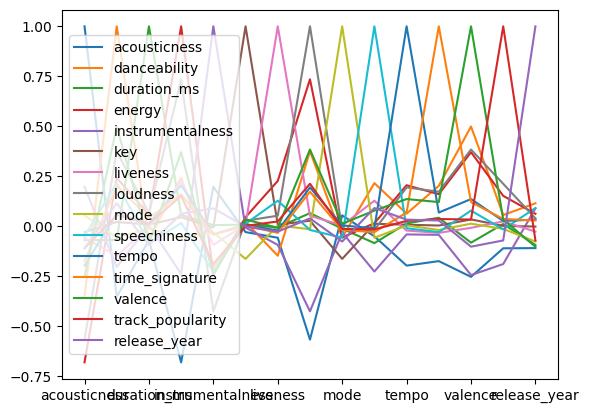

In [5]:
# Plot data

corr.plot()
# What are the peaks?

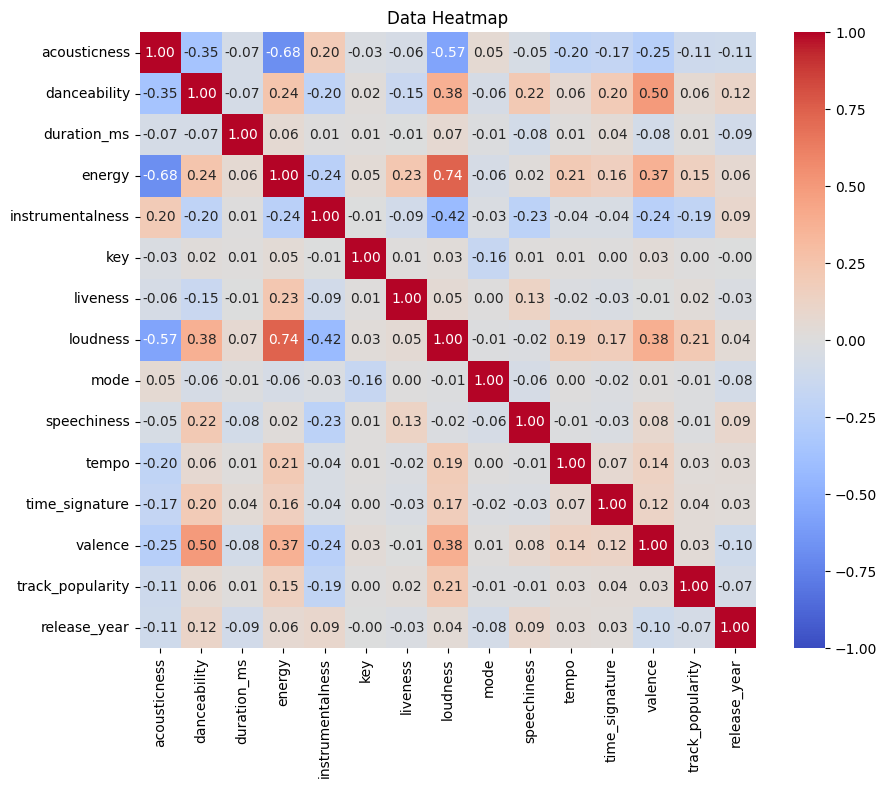

In [6]:
# Add heatmaps on data
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, annot=True, square=True, cmap="coolwarm", fmt=".2f", vmax=1, vmin=-1, center=0
)
plt.title("Data Heatmap")
plt.show()

<Figure size 1000x800 with 0 Axes>

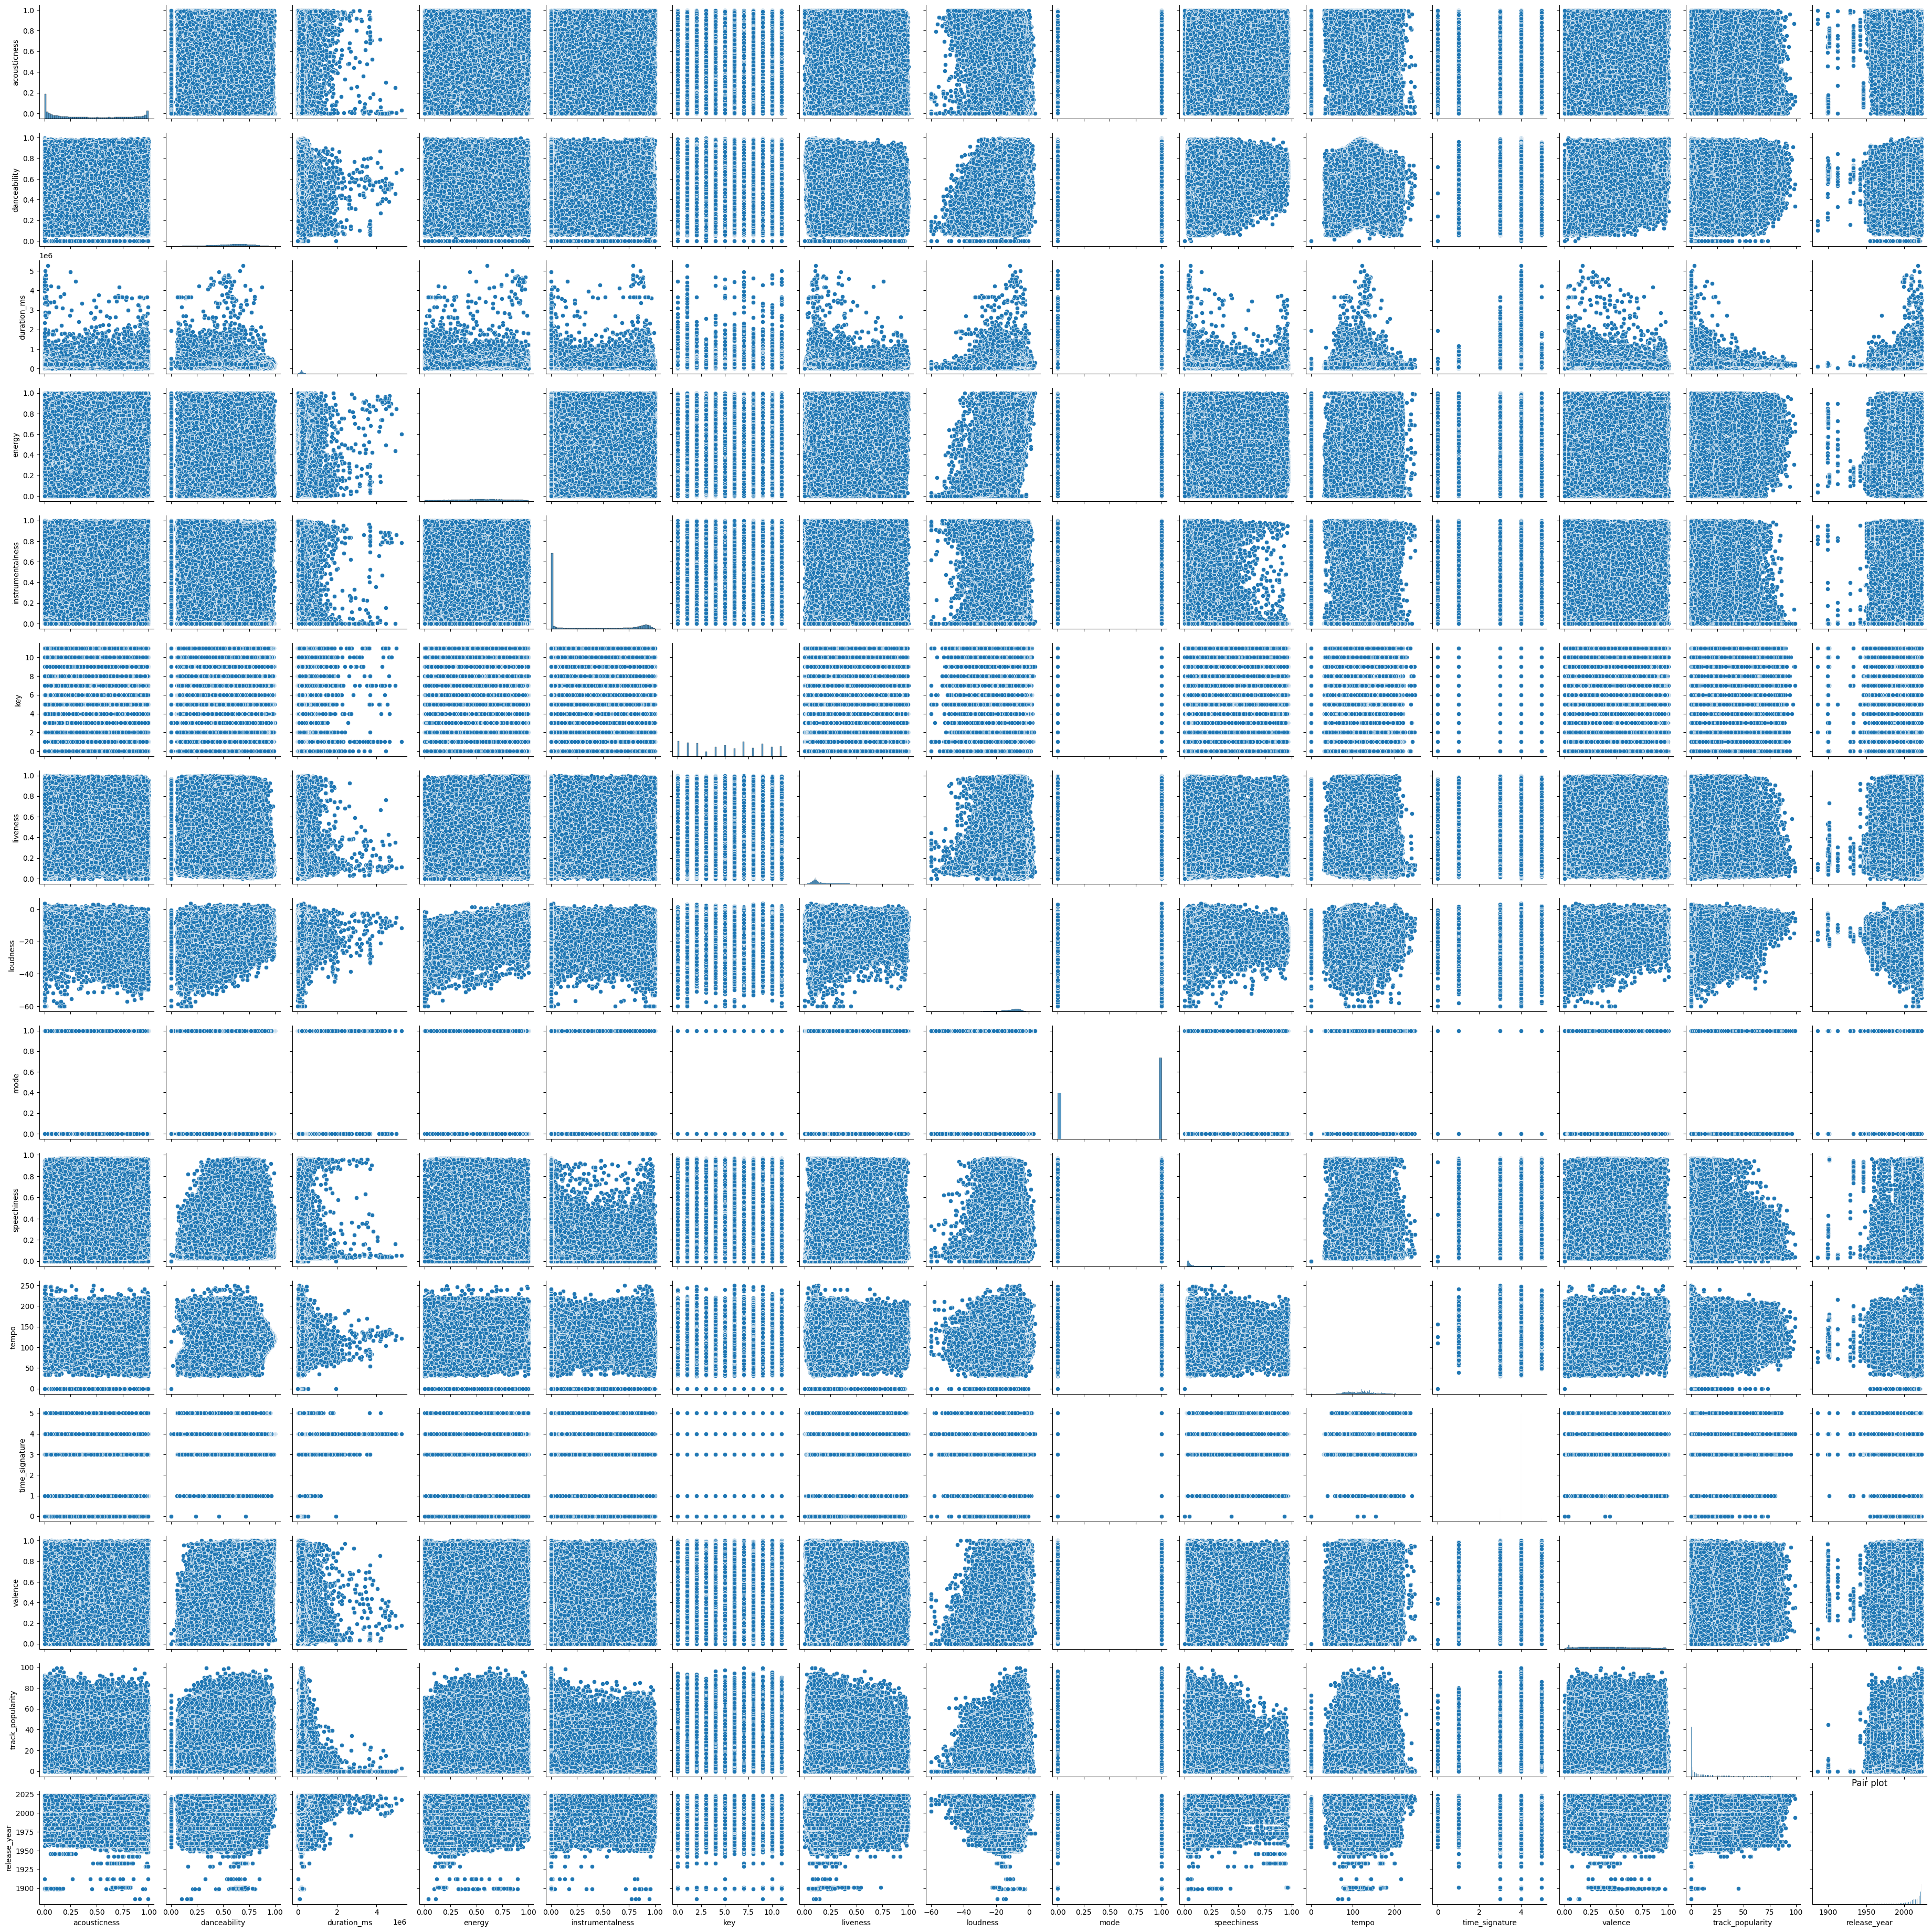

In [7]:
# Pairplot to see relationships between columns
plt.figure(figsize=(10, 8))
sns.pairplot(workable_data)
plt.title("Pair plot")
plt.show()

In [8]:
x = workable_data.drop(columns=['track_popularity'], inplace=False)
y = data[['track_popularity']]

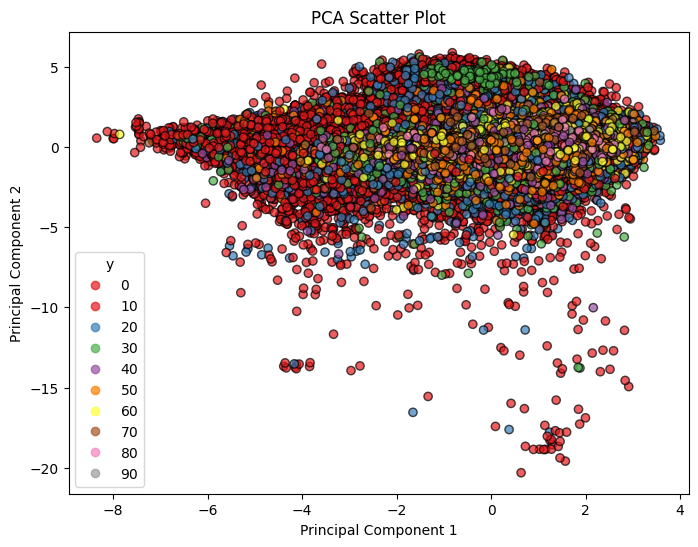

In [9]:
# PCA Decomposition
# Stolen from given code
from sklearn.decomposition import PCA

pca = PCA(2)

x_norm = (x - x.mean()) / x.std()
x_pca = pca.fit_transform(x_norm)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c=y.values.astype(int), cmap="Set1", alpha=0.7, edgecolor='k'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(*scatter.legend_elements(), title='y')
plt.show()

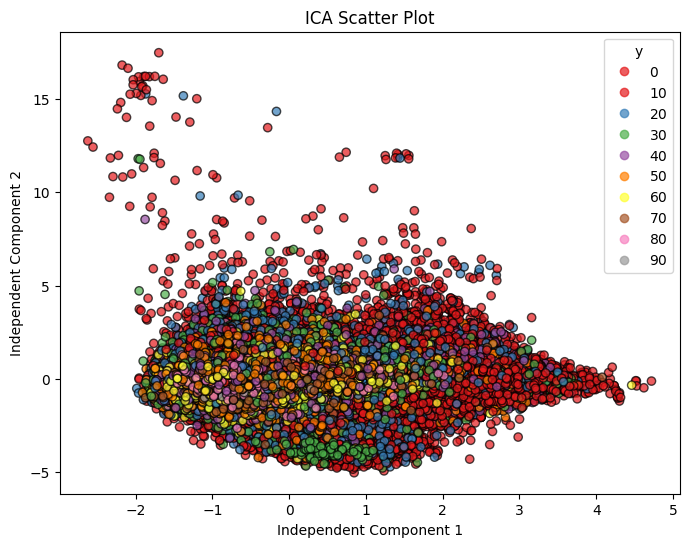

In [10]:
# ICA Decomposition
# Stolen from given code
from sklearn.decomposition import FastICA

ica = FastICA(2)

x_norm = (x - x.mean()) / x.std()
x_ica = ica.fit_transform(x_norm)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x_ica[:, 0], x_ica[:, 1], c=y.values.astype(int), cmap="Set1", alpha=0.7, edgecolor='k'
)

plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA Scatter Plot')
plt.legend(*scatter.legend_elements(), title='y')
plt.show()

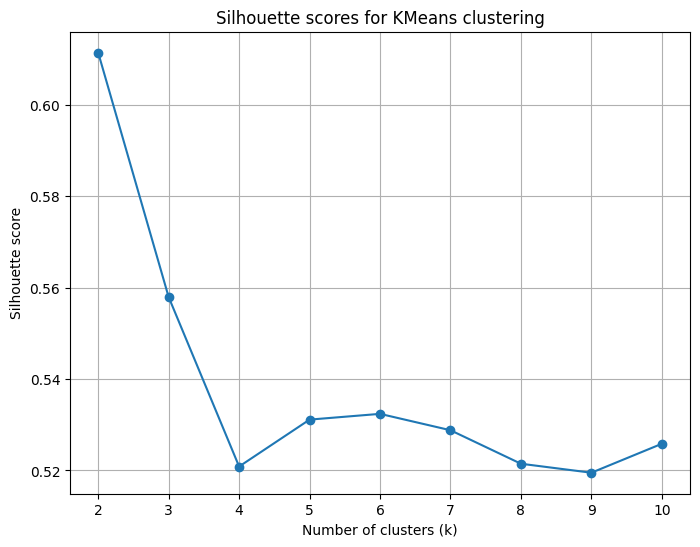

In [11]:
# K-Means clustering
# Stolen from given code
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for KMeans clustering')
plt.grid(True)
plt.show()


# Data Modeling

(array([0, 1]), array([361082,  13250]))


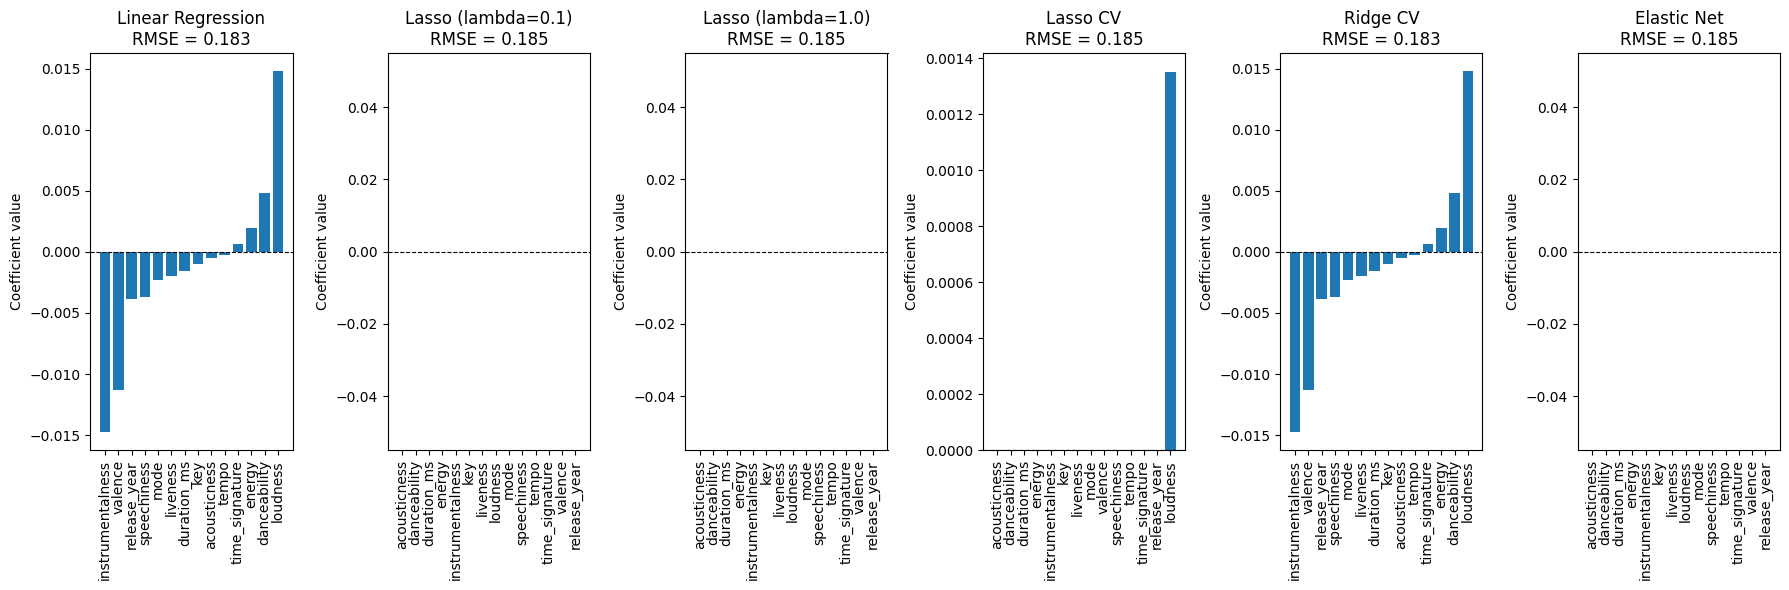

In [12]:
# Stolen from given code
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Extract y as a 1D array
# y_vec = np.array(y['track_popularity'].values)

y_vec = np.array(y["track_popularity"] > 50).astype(int)
print(np.unique(y_vec, return_counts=True))

feature_names = x.columns

models = {
    "Linear Regression": LinearRegression(),
    "Lasso (lambda=0.1)": Lasso(alpha=0.1, random_state=0, max_iter=10000),
    "Lasso (lambda=1.0)": Lasso(alpha=1.0, random_state=0, max_iter=10000),
    "Lasso CV": LassoCV(random_state=0, max_iter=10000),
    "Ridge CV": RidgeCV(),
    "Elastic Net": ElasticNet(),
}

coeffs = {}
rmses = {}

x_norm = (x - x.mean()) / x.std()

for name, model in models.items():
    model.fit(x_norm, y_vec)
    coeffs[name] = model.coef_
    y_pred = model.predict(x_norm)
    rmse = np.sqrt(mean_squared_error(y_vec, y_pred))
    rmses[name] = rmse

fig, axes = plt.subplots(1, len(models), figsize=(18, 6), sharey=False, sharex=False)

for ax, (name, coef) in zip(axes, coeffs.items()):
    sorted_idx = np.argsort(coef)
    sorted_coef = coef[sorted_idx]
    sorted_features = feature_names[sorted_idx]

    ax.bar(range(len(sorted_coef)), sorted_coef)
    ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
    ax.set_xticks(range(len(sorted_coef)))
    ax.set_xticklabels(sorted_features, rotation=90)
    ax.set_title(f"{name}\nRMSE = {rmses[name]:.3f}")
    ax.set_ylabel("Coefficient value")

plt.tight_layout()
plt.show()
